In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


Integral over Q for W7Xhis05 104.719 is: 142.0649780167435
Integral over Q for W7Xhis05 665.979 is: 132.06054073417238
Integral over E for W7Xhis05 104.719 is: 38.590698235110544
Integral over E for W7Xhis05 665.979 is: 3.799397884568087
Integral over e for W7Xhis05 104.719 is: -78.3049746921596
Integral over e for W7Xhis05 665.979 is: -13.630978491017826


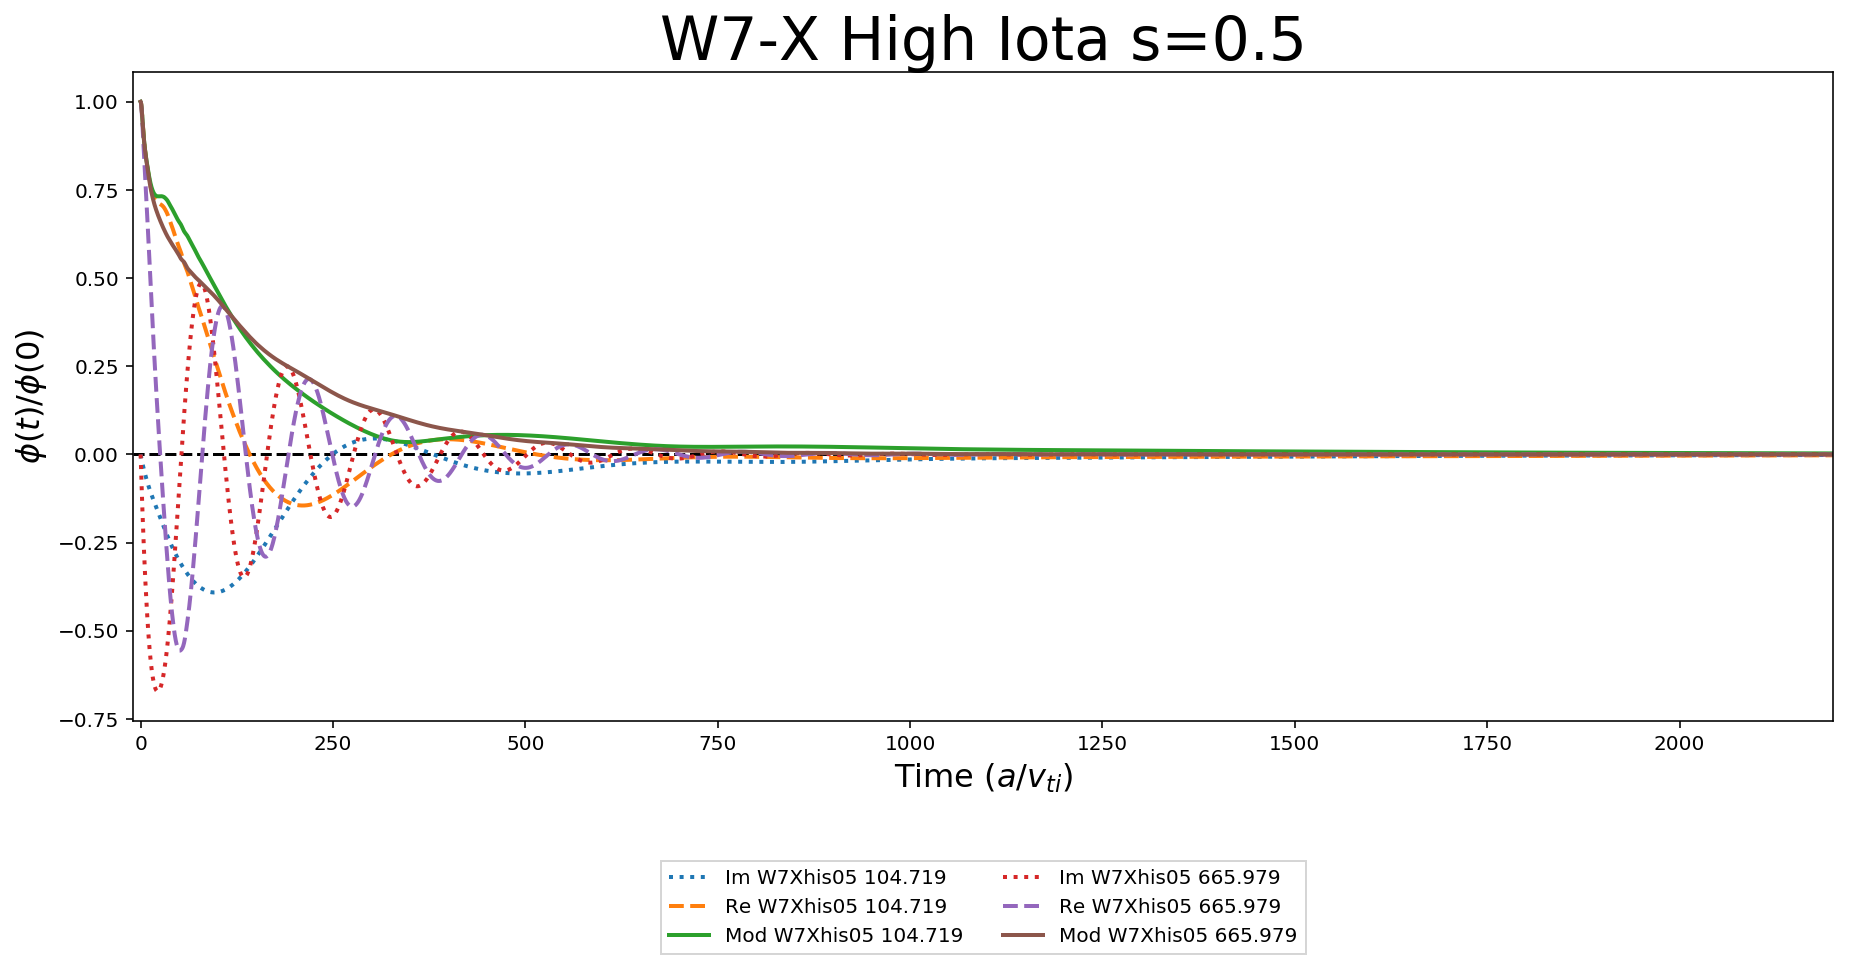

In [7]:
data1 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/104.719/gamdiagions_act.dat')
E1 = (data1[:,1]*(1/data1[0, 1]))
e1 = (data1[:,2]*(1/data1[0, 1]))
t1 = data1[:,0]

data2 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhis05/GAM/665.979/gamdiagions_act.dat')
E2 = (data2[:,1]*(1/data2[0, 1]))
e2 = (data2[:,2]*(1/data2[0, 1]))
t2 = data2[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Iota s=0.5', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,2200])

Q1 = np.sqrt(E1**2+e1**2)
ax1.plot(t1, e1, linewidth=2, label=('Im W7Xhis05 104.719'),linestyle='dotted')
ax1.plot(t1, E1, linewidth=2, label=('Re W7Xhis05 104.719'),linestyle='dashed')
ax1.plot(t1, Q1, linewidth=2, label=('Mod W7Xhis05 104.719'))

Q2 = np.sqrt(E2**2+e2**2)
ax1.plot(t2, e2, linewidth=2, label=('Im W7Xhis05 665.979'),linestyle='dotted')
ax1.plot(t2, E2, linewidth=2, label=('Re W7Xhis05 665.979'),linestyle='dashed')
ax1.plot(t2, Q2, linewidth=2, label=('Mod W7Xhis05 665.979'))

plt.legend(loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=2)

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ11 = (np.trapz(Q1,t1))
integ12 = (np.trapz(E1,t1))
integ13 = (np.trapz(e1,t1))
integ21 = (np.trapz(Q2,t2))
integ22 = (np.trapz(E2,t2))
integ23 = (np.trapz(e2,t2))

print("Integral over Q for W7Xhis05 104.719 is:", integ11)
print("Integral over Q for W7Xhis05 665.979 is:", integ21)

print("Integral over E for W7Xhis05 104.719 is:", integ12)
print("Integral over E for W7Xhis05 665.979 is:", integ22)

print("Integral over e for W7Xhis05 104.719 is:", integ13)
print("Integral over e for W7Xhis05 665.979 is:", integ23)